In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## add ml specific libs later

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('fifa21_male2.csv')

In [4]:
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [6]:
pd.set_option('display.max_rows', 300) # increase how may rows to display to see sums for all columns 
df.isna().sum()

ID                      0
Name                    0
Age                     0
OVA                     0
Nationality             0
Club                   23
BOV                     0
BP                      0
Position              413
Player Photo            0
Club Logo              23
Flag Photo              0
POT                     0
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 58
Loan Date End       16215
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                58
Skill                   0
Dribbling               0
Curve                  58
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed

In [7]:
df.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.000000,64.000000,65.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


## Data Cleaning

In [8]:
# consolidate namings
# check for null values
# check for type issues in columnns
# check if I should reset my index reference 

df.columns = [ col.lower().replace(' ', '_') for col in df.columns]
df = df.set_index('id')

In [9]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes('number')

In [10]:
df_cat.columns

Index(['name', 'nationality', 'club', 'bp', 'position', 'player_photo',
       'club_logo', 'flag_photo', 'team_&_contract', 'height', 'weight',
       'foot', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause',
       'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk', 'gender'],
      dtype='object')

In [11]:
df_num.columns

Index(['age', 'ova', 'bov', 'pot', 'growth', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy'],
      dtype='object')

In [12]:
print(len(df_cat.columns))
print(len(df_num.columns))

52
54


In [13]:
df[['height', 'weight', 'foot', 'joined', 'value', 'wage', 'hits']] 

,height,weight,foot,joined,value,wage,hits
id,,,,,,,
2,"6'0""",181lbs,Left,"Jul 1, 2008",€625K,€7K,4
16,"5'10""",143lbs,Right,"Jul 19, 2014",€600K,€7K,4
27,"5'9""",161lbs,Right,"Jan 7, 2016",€1.1M,€15K,11
36,"5'11""",165lbs,Right,NaN,€0,€0,3
41,"5'7""",150lbs,Right,"Jul 16, 2018",€5.5M,€12K,149
...,...,...,...,...,...,...,...
259088,"6'6""",165lbs,Right,"Sep 29, 2020",€550K,€2K,5
259090,"5'10""",170lbs,Right,"Aug 20, 2020",€130K,€3K,5
259091,"5'9""",154lbs,Right,"Aug 20, 2020",€130K,€2K,3


In [54]:
df_1 = df.copy()

In [55]:
# convert height to cm numerical
def feet_inches_to_cm(val):
    feet_inches = val.split('\'')
    cm = float(feet_inches[0]) * 30.48
    cm += float(feet_inches[1].replace('"', '')) * 2.54
    return cm

df_1['height'] = df_1['height'].map(feet_inches_to_cm)

In [56]:
# convert weight to numerical
df_1['weight'] = df_1['weight'].map(lambda v: int(v.replace('lbs', '')))

In [57]:
# convert value and wage to numericals
def convert_to_eur(val):
    eur = 0
    if val == '€0':
        eur = 0
    elif 'K' in val:
        eur = float(val.replace('€', '').replace('K', '')) * 1000
    elif 'M' in val:
        eur = float(val.replace('€', '').replace('M', '')) * 1000000
    return eur
    
df_1['value'] = df_1['value'].map(convert_to_eur)
df_1['wage'] = df_1['wage'].map(convert_to_eur)

In [ ]:
len(df_1['hits'].unique())

In [59]:
# convert hits to numerical
def hits_to_numerical(val):
    if  type(val) == str and 'K' in val:
        val = float(val.replace('K', '')) * 1000
    else:
        val = float(val)
    return val

df_1['hits'] = df_1['hits'].map(hits_to_numerical)

In [65]:
# dropping cols
df_1.drop(['player_photo', 'club_logo', 'flag_photo', 'team_&_contract', 'release_clause', 'contract', 'loan_date_end'], axis=1, inplace=True)

In [66]:
df_1_cat = df_1.select_dtypes('object')
df_1_num = df_1.select_dtypes('number')

df_1_cat.columns

Index(['name', 'nationality', 'club', 'bp', 'position', 'foot', 'joined',
       'w/f', 'sm', 'a/w', 'd/w', 'ir', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'gender'],
      dtype='object')

In [70]:
# drop all nans
df_1.dropna(inplace=True)

## EDA

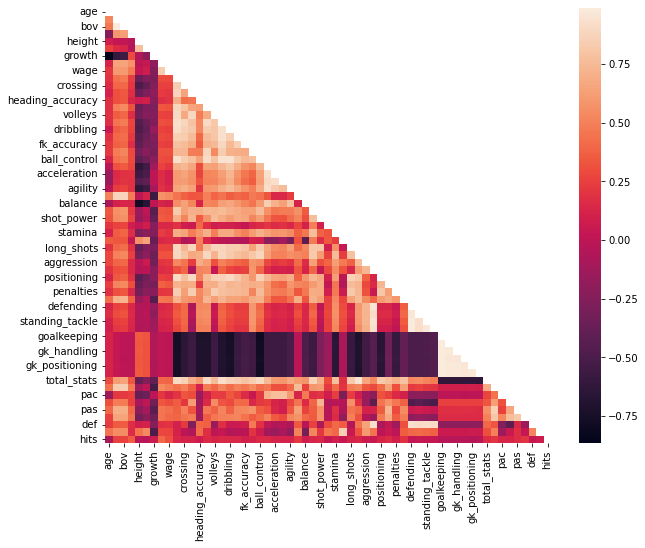

In [80]:
# only check for correlation for now
mask = np.zeros_like(df_1.corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_1.corr(), mask=mask, annot=False)
plt.show()

In [81]:
# small func to be able to get more meaningful insight
def check_correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [82]:
check_correlation(df_1_num, 0.9)

{'acceleration',
 'agility',
 'ball_control',
 'bov',
 'curve',
 'def',
 'defending',
 'dribbling',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'marking',
 'positioning',
 'skill',
 'sliding_tackle',
 'sprint_speed',
 'standing_tackle',
 'total_stats'}

## Feature Engineering